In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [24]:
img,img_hsv = (None,None)
def load_img(addr):
    global img,img_hsv
    img = cv2.imread(addr)
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

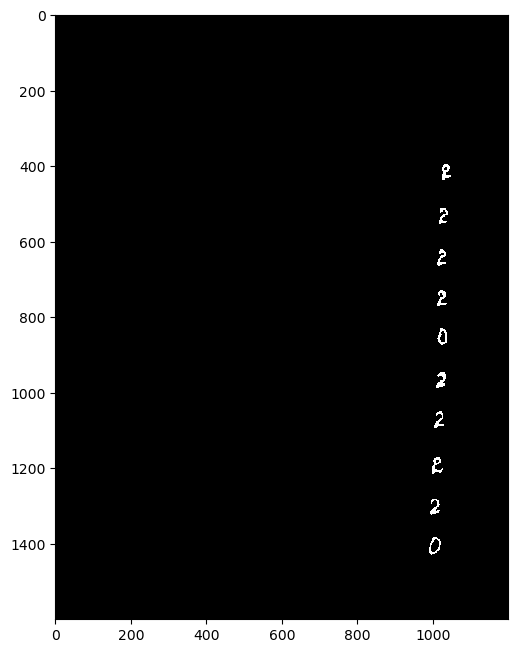

In [90]:
# load_img('marking _final/data_test/3.jpg')
load_img('data/4.jpeg')

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([155,25,0])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1

# minimum size of particles we want to keep (number of pixels)
#here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
min_size = 150

#your answer image
img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        img2[output == i + 1] = 255

plt.imshow(img2,'gray')

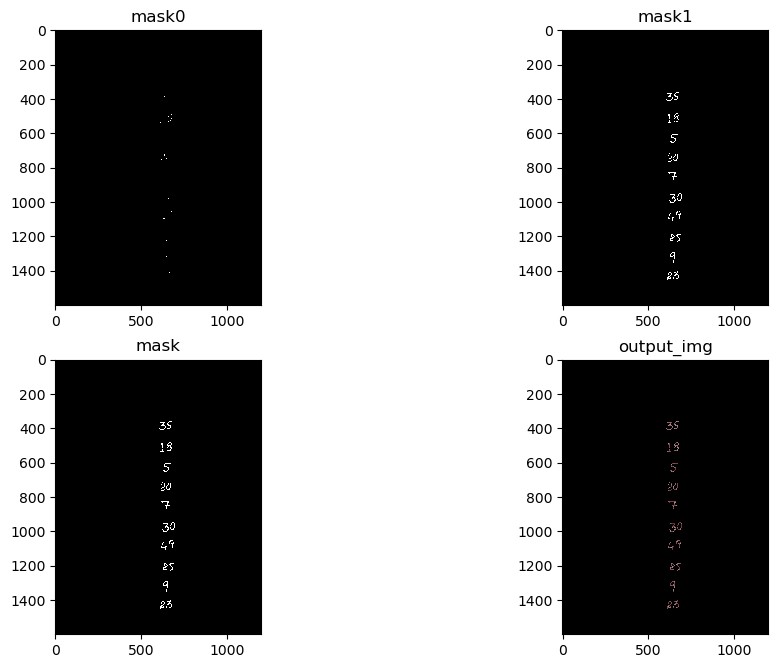

In [22]:
plt.subplot('221')
plt.title('mask0')
plt.imshow(mask0,'gray')

plt.subplot('222')
plt.title('mask1')
plt.imshow(mask1,'gray')

plt.subplot('223')
plt.title('mask')
plt.imshow(mask,'gray')

plt.subplot('224')
plt.title('output_img')
plt.imshow(output_img)
